-----
# Data Preprocessing
-----

##TODO: ADD SUMMARY/CONC

## Set Up
-----

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [2]:
sys.path.append('../../src')

from data_preprocess import Data_Preprocess

## Utility Functions
-----

In [3]:
def df_check(df):
    '''
    Outputs quality measures for dataframes

    Paramters
    ---------
    df: DataFrame for quality check

    Returns
    -------
    Statements with data quality info such as shape, duplicated values, missing values
    '''
    
    shape = df.shape
    # Calling sum twice - first sum returns column level results second sum to retrun total null values in all columns
    null_vals = df.isna().sum().sum()
    duplicated_rows = df.duplicated().sum()
    duplicated_cols = df.columns.duplicated().sum()

    print (
    f"""
    Data Quality Checks:
    --------------------------------------------
    No. of rows: {shape[0]}
    No. of columns: {shape[1]}
    No. of missing values: {null_vals}
    No. of duplicated rows: {duplicated_rows}
    No. of duplicated columns: {duplicated_cols}
    """
)
    


## Data Visualisation
----

In [4]:
car_df = pd.read_csv('../../data/CarPrice_Assignment.csv')

In [5]:
num_cols = car_df.select_dtypes( exclude='object').columns
cat_cols = car_df.select_dtypes(include='object').columns

In [6]:
car_df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Numerical Columns

In [7]:
car_df['car_ID'].median()

np.float64(103.0)

In [8]:
car_df['stroke'].value_counts()

stroke
3.400    20
3.230    14
3.150    14
3.030    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.270     6
3.410     6
3.070     6
3.580     6
3.190     6
3.500     6
3.640     5
3.520     5
3.860     4
3.540     4
3.470     4
3.255     4
3.900     3
2.900     3
3.100     2
4.170     2
2.800     2
2.190     2
3.080     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
2.870     1
Name: count, dtype: int64

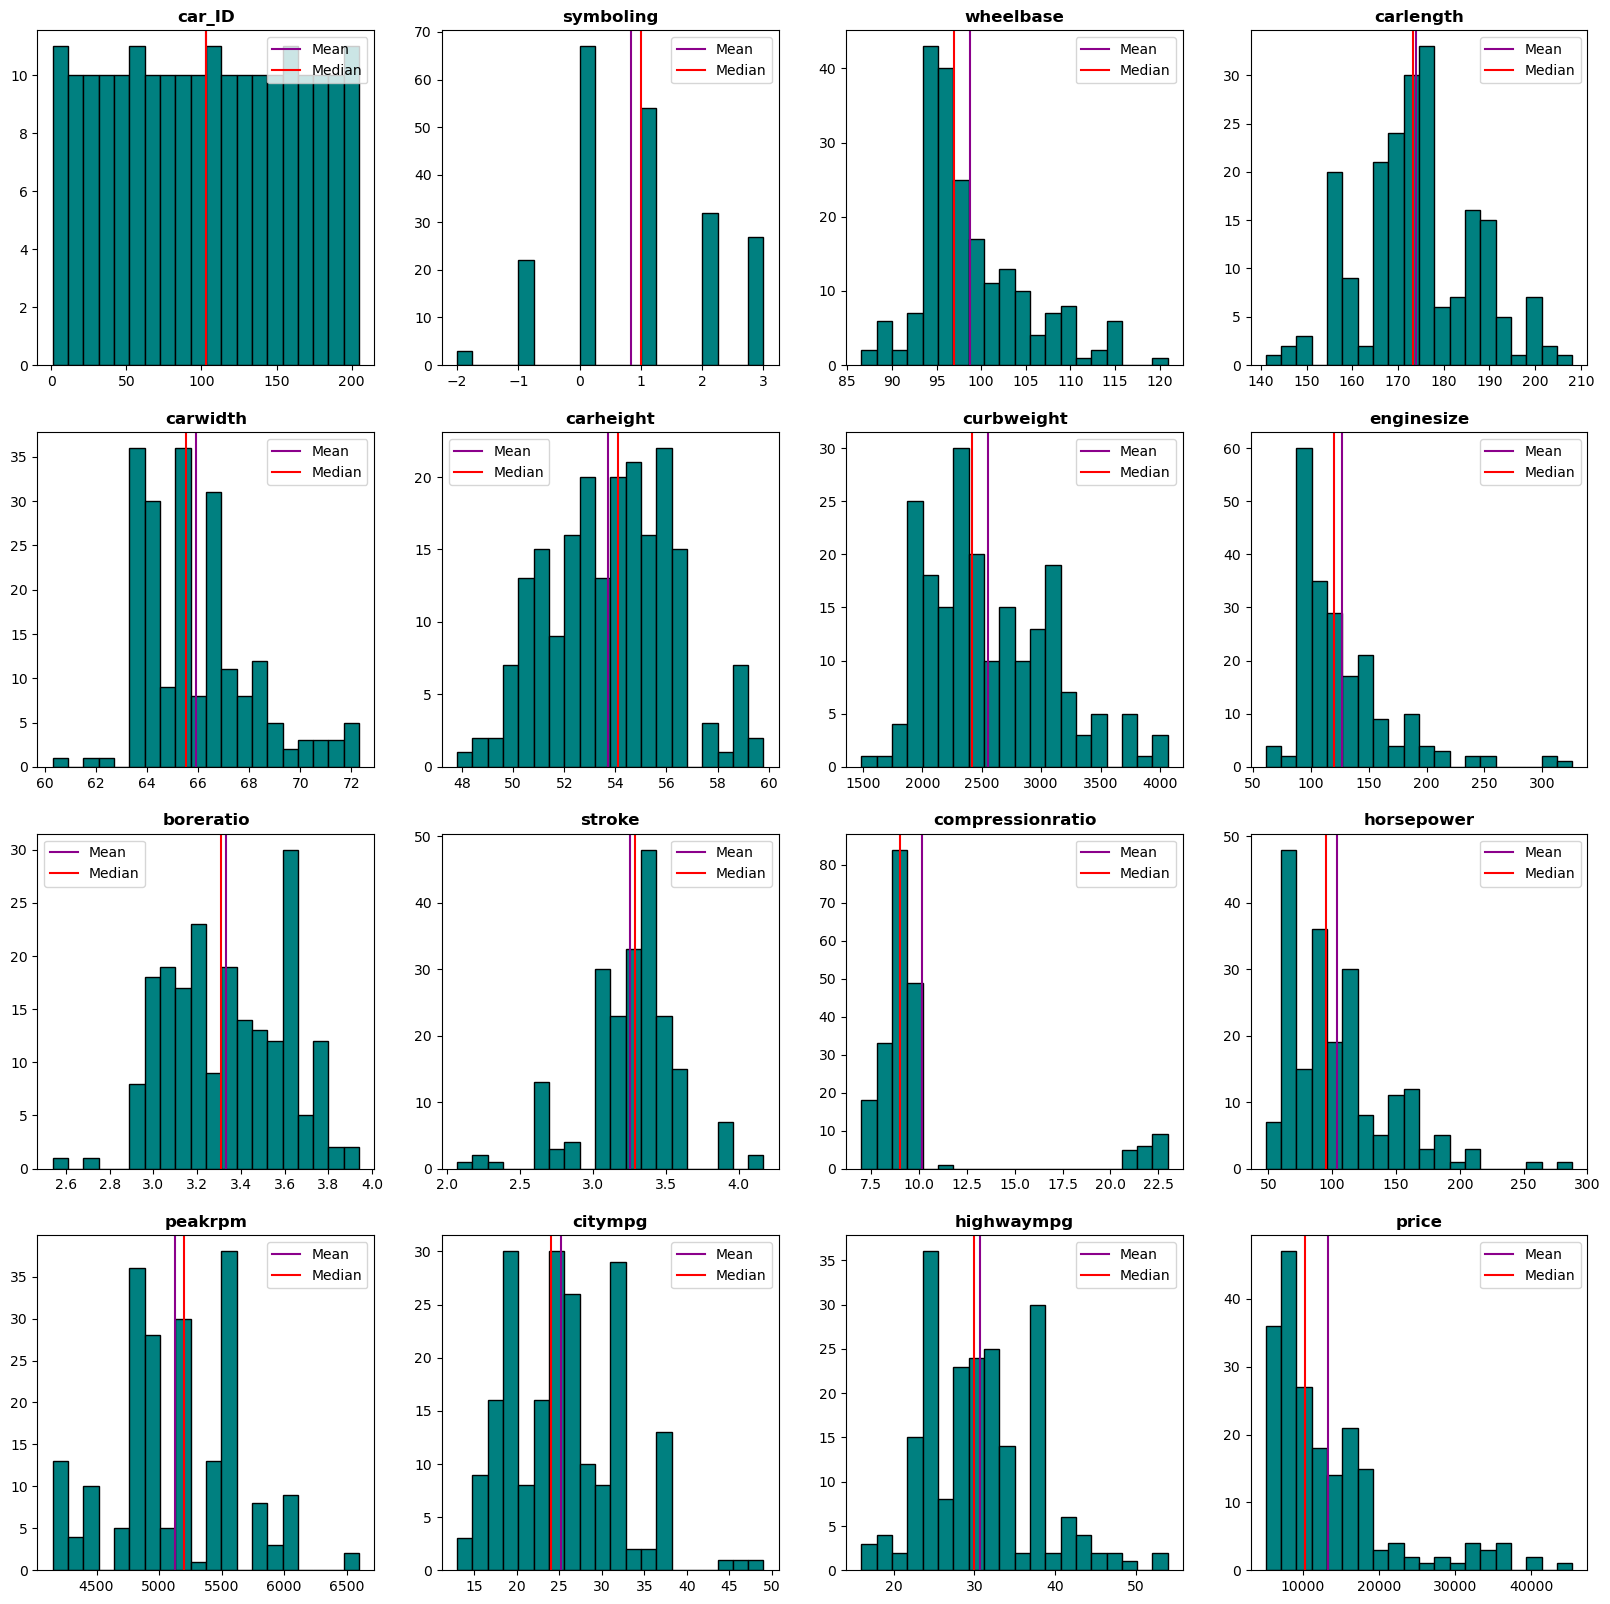

In [9]:
# Visualise data in numerical columns 
plt.subplots(4,4,figsize=(20,20))

for i,col in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    plt.hist(car_df[col], bins = 20,edgecolor='black',color='teal')
    plt.axvline(car_df[col].mean(), color='darkmagenta', label= 'Mean')
    plt.axvline(car_df[col].median(), color='red',label= 'Median')
    plt.title(col, fontweight= 'bold')
    plt.legend()

plt.show()


**Key Insights:**

- **car ID** - Not required for the analysis, IDs are unique identifiers and so should not have an affect on price(the target variable).

- **symboling** - Looks like a categorical variable, should use label encoding to make this variable categorical before I begin modelling.

- **wheel base** - Slight positive skewness in the data as the mean is greater than the median. If you look at the histogram, the larger less frequent values seem to pull the mean upwards.

- **engine size** - Looks as though it might be a log-normal distribution as the data looks skewed to the right due to a long tail to the right.

- **horse power** - Looks as though it might also be a log-normal distribution as the data looks skewed to the right due to a long tail to the right.

- **peak rmp** - Looks as if there are ranges here which data falls in, to investigate this to see if data can be categorised.

- **compression ratio** Clear there are two main groups, assuming there compression ratio for standard cars is different to that of higher performing cars especially since compression ratio is regarding engine operation.

- **highway mpg** - Looks as if there are two peaks in the highwaympg column, this suggests two clusters in the column one which is lower the other which is higher.

**Target Column: PRICE**
- Right sweked with the mean greater than the median suggesting few outliers to the right (tail) are pulling the mean up
- The outliers in the histogram suggests there are some cars in the dataset that are significantly more expensive than the majority of cars.

### Categorical Columns

In [10]:
for col in cat_cols:
    print(col,len(car_df[col].value_counts().index))

CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


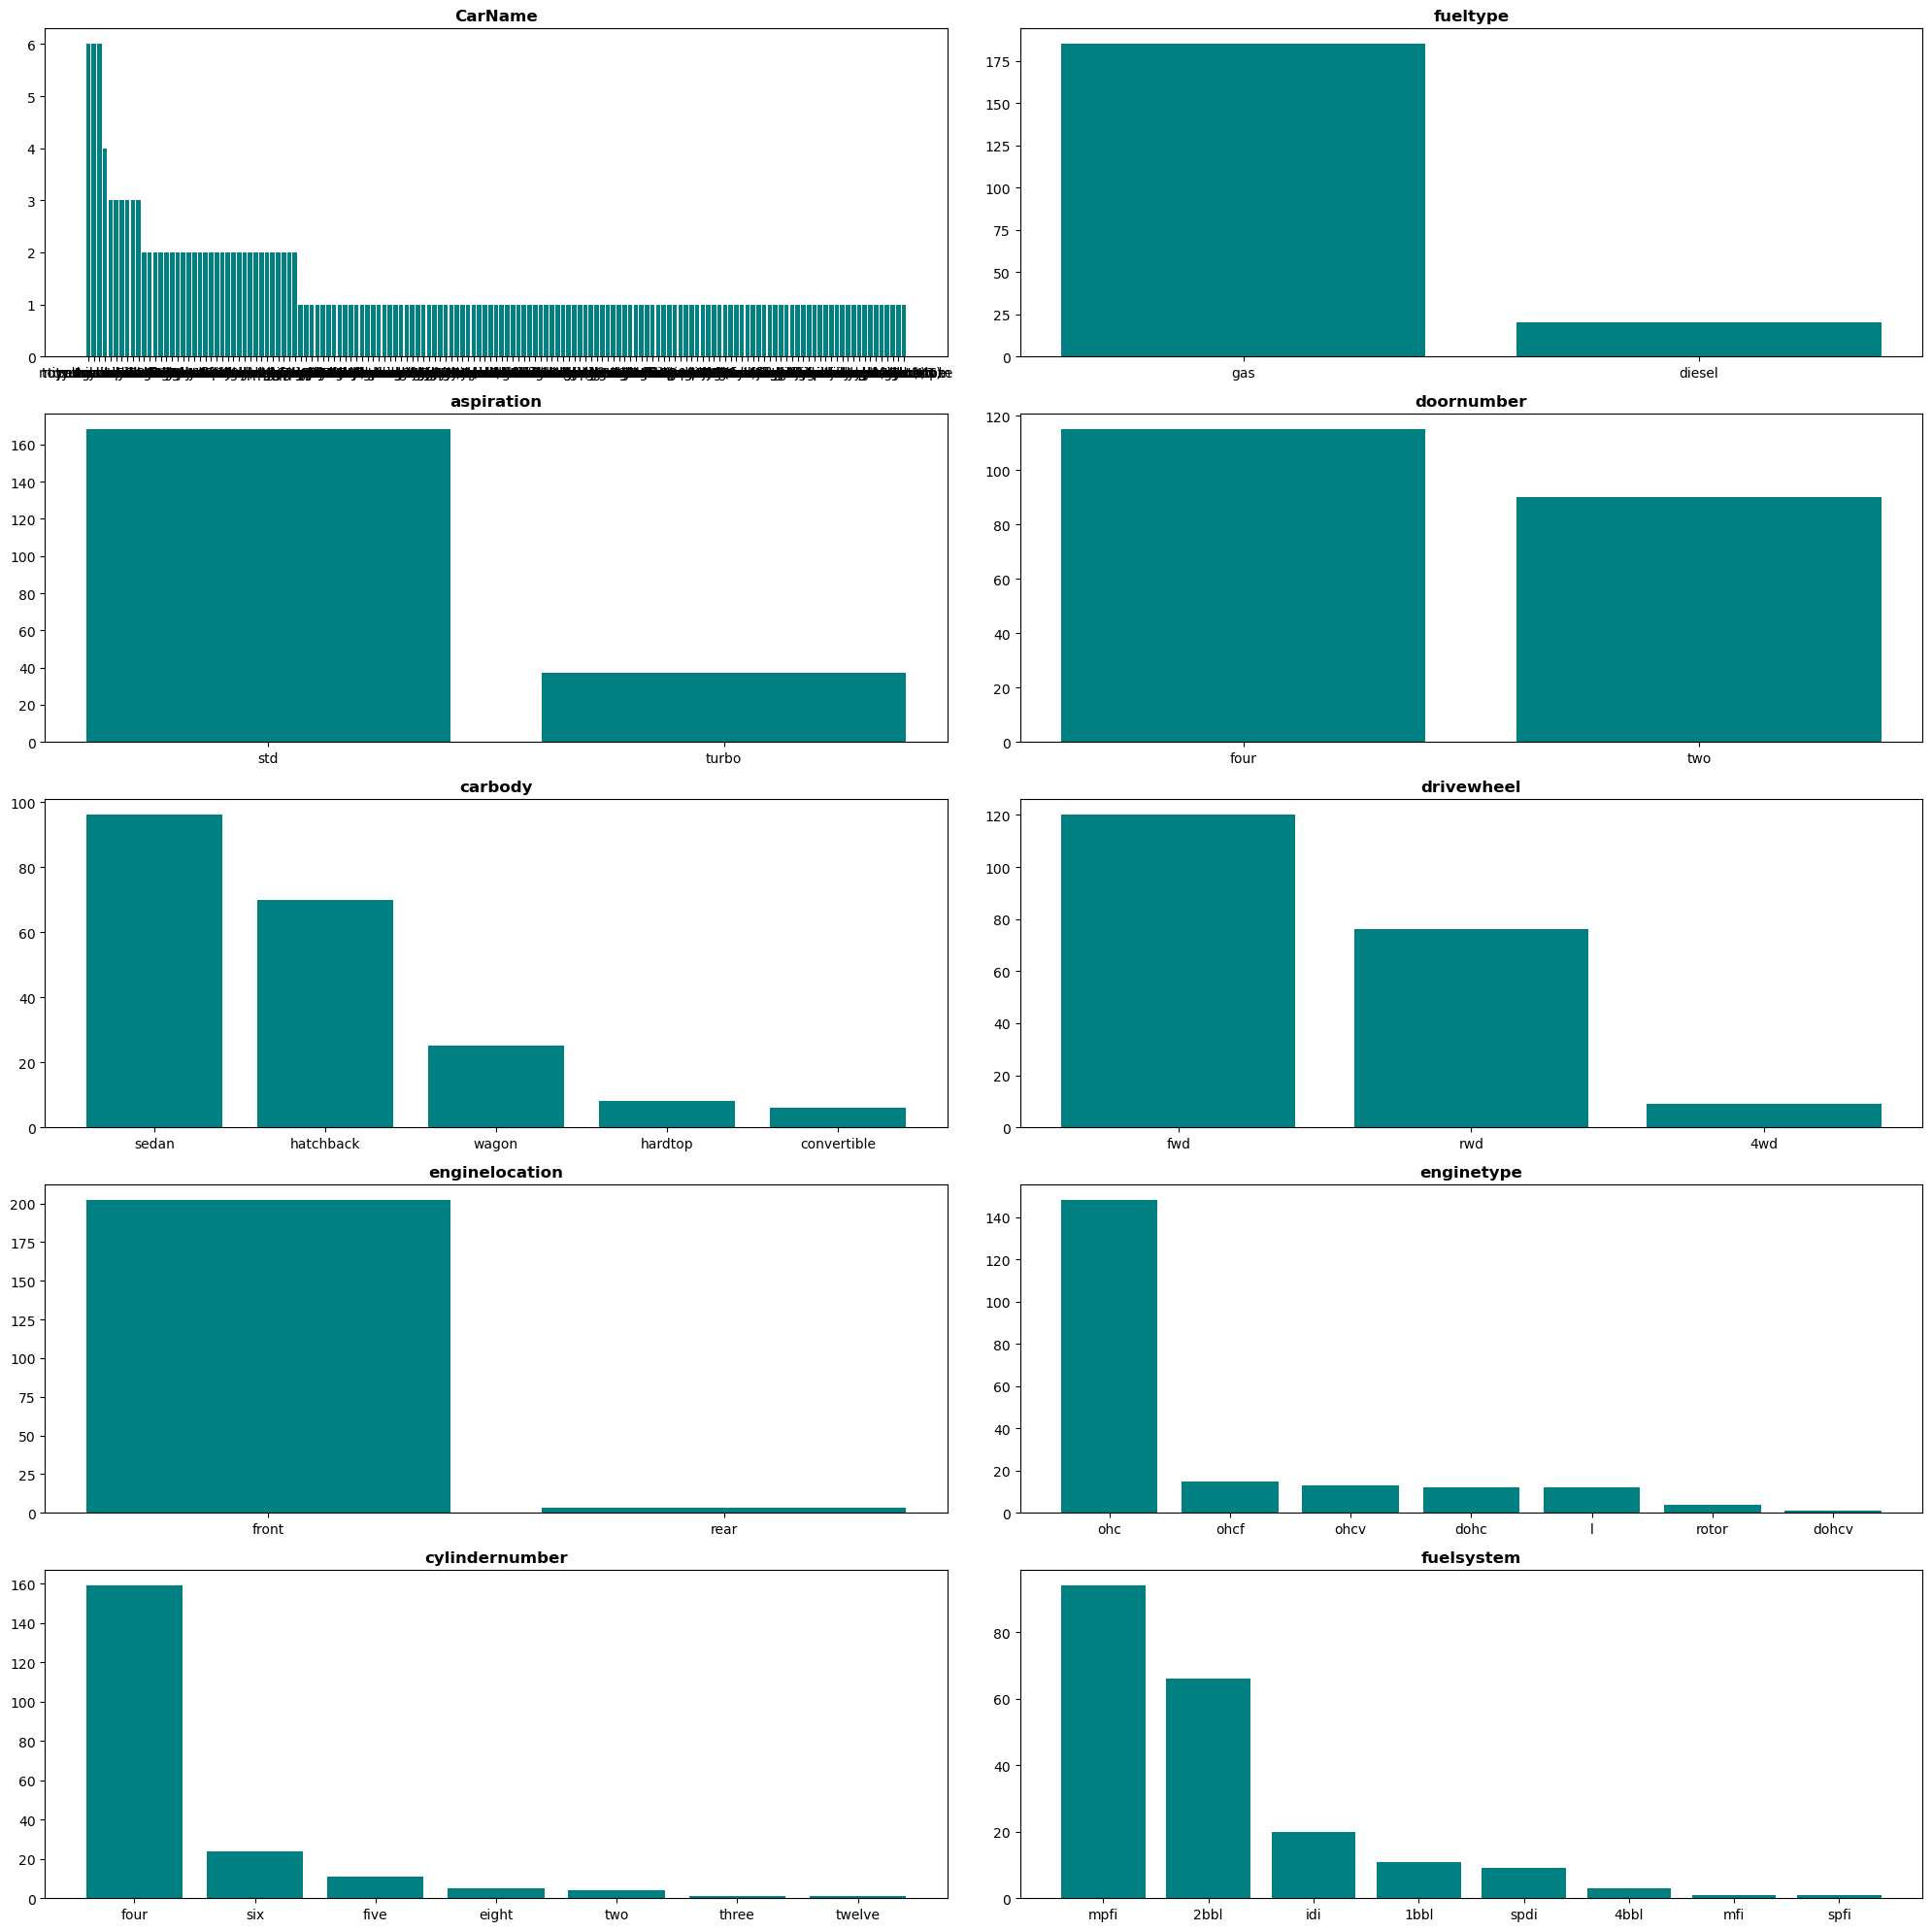

In [11]:
# Visualise data in categorical columns 
plt.subplots(5,2,figsize=(20,20))

for i,col in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    plt.bar(x = car_df[col].value_counts().index ,height = car_df[col].value_counts().values, color = 'teal')
    plt.title(col, fontweight= 'bold')
plt.tight_layout()
plt.show()


**Key Insights**

- **car name** - Too many distinct values in this column, will likely be removed in analysis when checking assumption 1 (relationship to target varaible price)

In the dataset, it is clear that there is an affinity towards standard cars characterised by gas fuel type, front-wheel drive (FWD), engine placement at the front, etc. 
These typical characteristics domininate the dataset as seen above and reflect a 'norm' in the car industry. Cars with these specifications are more prevelant and so 
could suggest to a higher market demand which could affect pricing.





## Log Transformation of Engine Size and Horse Power columns
----

In [12]:
# first to make copy of df before making any changes 
mod_car_df = car_df.copy()

In [13]:
df_check(mod_car_df)


    Data Quality Checks:
    --------------------------------------------
    No. of rows: 205
    No. of columns: 26
    No. of missing values: 0
    No. of duplicated rows: 0
    No. of duplicated columns: 0
    


### Engine Size

In [14]:
mod_car_df['enginesize_transformed'] = np.log(mod_car_df['enginesize'])

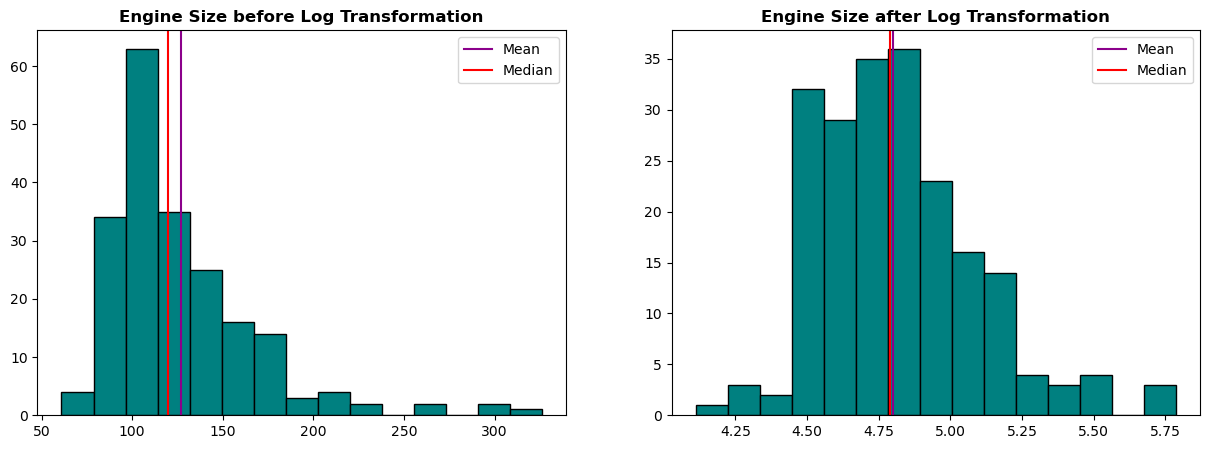

In [15]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(mod_car_df['enginesize'], bins = 15,edgecolor='black',color='teal')
plt.axvline(mod_car_df['enginesize'].mean(), color='darkmagenta', label= 'Mean')
plt.axvline(mod_car_df['enginesize'].median(), color='red',label= 'Median')
plt.title('Engine Size before Log Transformation', fontweight= 'bold')
plt.legend()

plt.subplot(1,2,2)
plt.hist(mod_car_df['enginesize_transformed'], bins = 15,edgecolor='black',color='teal')
plt.axvline(mod_car_df['enginesize_transformed'].mean(), color='darkmagenta', label= 'Mean')
plt.axvline(mod_car_df['enginesize_transformed'].median(), color='red',label= 'Median')
plt.title('Engine Size after Log Transformation', fontweight= 'bold')

plt.legend()
plt.show()

**Comment**

By applying log transformation on enginesize the data appears to be more normally distributed with little difference between the mean and median.

### Horse Power

In [16]:
mod_car_df['horsepower_transformed'] = np.log(mod_car_df['horsepower'])

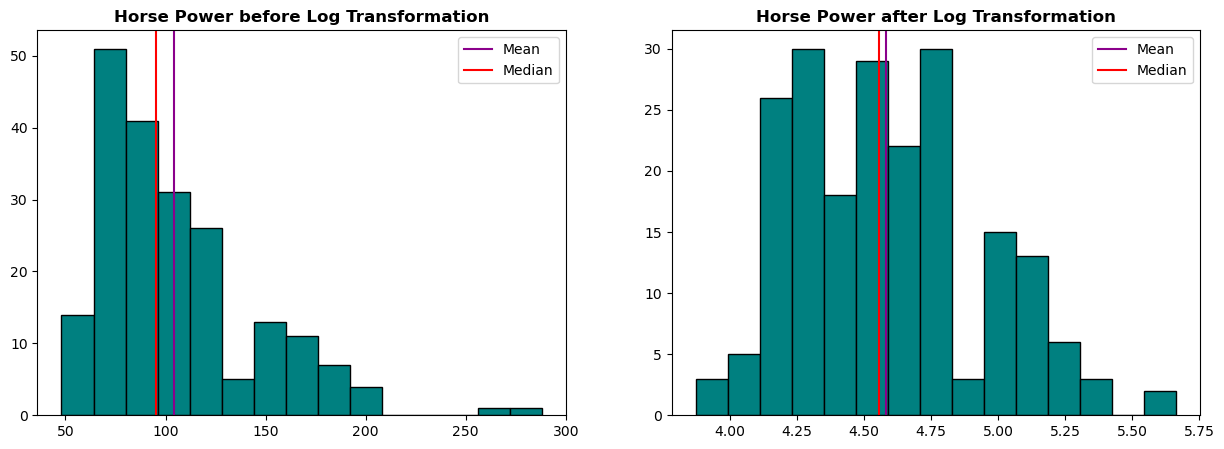

In [17]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(mod_car_df['horsepower'], bins = 15,edgecolor='black',color='teal')
plt.axvline(mod_car_df['horsepower'].mean(), color='darkmagenta', label= 'Mean')
plt.axvline(mod_car_df['horsepower'].median(), color='red',label= 'Median')
plt.title('Horse Power before Log Transformation', fontweight= 'bold')
plt.legend()

plt.subplot(1,2,2)
plt.hist(mod_car_df['horsepower_transformed'], bins = 15,edgecolor='black',color='teal')
plt.axvline(mod_car_df['horsepower_transformed'].mean(), color='darkmagenta', label= 'Mean')
plt.axvline(mod_car_df['horsepower_transformed'].median(), color='red',label= 'Median')
plt.title('Horse Power after Log Transformation', fontweight= 'bold')
plt.legend()

plt.show()

**Comment**

Again, we see thee effect of log transformation on horse power. The scale is now compressed and the range of values is reduced with a smaller difference between the mean and median. 

The shape of the distribution is also appearing to be more normal.

In [18]:
# Dropping both un-transformed columns as no longer required
mod_car_df.drop(columns=['enginesize','horsepower'], inplace=True)

In [19]:
df_check(mod_car_df)


    Data Quality Checks:
    --------------------------------------------
    No. of rows: 205
    No. of columns: 26
    No. of missing values: 0
    No. of duplicated rows: 0
    No. of duplicated columns: 0
    


## Dropping unnecessary columns
----

In [20]:
mod_car_df = mod_car_df.drop(columns= ['car_ID', 'CarName'])

In [21]:
df_check(mod_car_df) ## see duplication on deleting the car_id and car name


    Data Quality Checks:
    --------------------------------------------
    No. of rows: 205
    No. of columns: 24
    No. of missing values: 0
    No. of duplicated rows: 1
    No. of duplicated columns: 0
    


In [22]:
mod_car_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'enginesize_transformed',
       'horsepower_transformed'],
      dtype='object')

## Symboling
-----

Symboling represents a car's insurance risk level, this risk level corresponds to the car price.

Based on the distribution of values seen in the data I am making the as assumption that +3 means the risk is low and -3 means the risk is high with 0 being a standard level of risk.

I am unsure whether my intrepretatation of symboling is correct so for this reason I will just cast the values to be a string and will come back to this at a later point. Perhaps futehr on the analysis it would be clear if -3 is high or low risk.

In [23]:
mod_car_df['symboling'] = mod_car_df['symboling'].astype('str')

## WHERE TO PUT THIS?


Symboling represents a car's insurance risk level, this risk level corresponds to the car price.

Based on the distribution of values seen in the data I am making the as assumption that +3 means the risk is low and -3 means the risk is high with 0 being a standard level of risk.

I am unsure whether my intrepretatation of symboling is correct so for this reason I will just cast the values to be a string and will come back to this at a later point. Perhaps futehr on the analysis it would be clear if -3 is high or low risk.

## Scaling of Numerical Variables
----

In [24]:
# redefine new num_cols cat_cols for modified df
num_cols = mod_car_df.select_dtypes(exclude='object').columns
cat_cols = mod_car_df.select_dtypes(include='object').columns

In [25]:
my_data_prcocessor = Data_Preprocess(mod_car_df)

In [26]:
scaled_df  = my_data_prcocessor.std_scaling()

## Encoding of Categorical Variables
-----

In [27]:
my_data_prcocessor = Data_Preprocess(scaled_df)

In [28]:
encoded_df  = my_data_prcocessor.get_dummies(threshold= 8, drop_first=False)

In [29]:
encoded_df

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,peakrpm,citympg,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,0.787855,-0.186865,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.787855,-1.106241,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,1.666445,-0.336970,-0.162161,0.577692,-0.340094,...,0,0,0,0,0,0,0,1,0,0
201,1.721873,1.198549,1.351515,0.728239,0.949992,1.666445,-0.336970,-0.364062,0.367529,-0.953012,...,0,0,0,0,0,0,0,1,0,0
202,1.721873,1.198549,1.398245,0.728239,0.878757,0.926204,-1.232021,-0.338824,0.787855,-1.106241,...,0,0,0,0,0,0,0,1,0,0
203,1.721873,1.198549,1.398245,0.728239,1.273437,-1.183483,0.462183,3.244916,-0.683286,0.119594,...,0,0,0,0,0,1,0,0,0,0


### Dropping dummies to avoid multicollinearity 

(This is as I set drop_first to False to have more control over which dummies to keep/delete)

In [30]:
cat_cols

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

#### Fuel Type

In [31]:
# to drop diesel and rename fuel_type_gas to is_gas
# 1 => fuel type is gas, 0=> fuel_type is diesel
encoded_df = encoded_df.drop(columns = ['fueltype_diesel'])

In [32]:
encoded_df = encoded_df.rename(columns= {'fueltype_gas' : 'is_gas'} )

#### Aspiration

In [33]:
# to drop std and rename aspiration_turbo to is_turbo
# 1 => aspiration is turbo, 0=> aspiration is std(standard)
encoded_df = encoded_df.drop(columns = ['aspiration_std'])

encoded_df = encoded_df.rename(columns= {'aspiration_turbo' : 'is_turbo'} )

#### DoorNumber

In [34]:
# to drop two and rename doornumber_four to has_four_doors
# 1 => doornumber is 4, 0=> doornumber is 2
encoded_df = encoded_df.drop(columns = ['doornumber_two'])

encoded_df = encoded_df.rename(columns= {'doornumber_four' : 'has_four_doors'} )

#### Car Body

In [35]:
# to drop wagon as wagon is similar to a hatchback and has lower frequency
encoded_df = encoded_df.drop(columns = ['carbody_wagon'])

#### Wheel Drive

In [36]:
encoded_df = encoded_df.drop(columns = ['drivewheel_4wd'])
encoded_df = encoded_df.rename(columns= {'drivewheel_fwd' : 'is_front_wheel_drive',
                                        'drivewheel_rwd':'is_rear_wheel_drive' 
                                         } 
                              )

#### Engine Location

In [37]:
encoded_df = encoded_df.drop(columns = ['enginelocation_rear'])

encoded_df = encoded_df.rename(columns= {'enginelocation_front' : 'is_front_engine'} )

#### Engine Type

In [38]:
encoded_df = encoded_df.drop(columns = ['enginetype_dohcv'])

#### Cyclinder number

In [39]:
encoded_df = encoded_df.drop(columns = ['cylindernumber_twelve'])
encoded_df = encoded_df.rename(columns= {'cylindernumber_eight' : 'is_eight_cylinder',
                                        'cylindernumber_five':'is_five_cylinder',
                                        'cylindernumber_four':'is_four_cylinder' ,
                                        'cylindernumber_six':'is_six_cylinder' ,
                                        'cylindernumber_three':'is_three_cylinder' ,
                                        'cylindernumber_two':'is_two_cylinder' 
                                         } 
                              )


#### Fuel System

In [40]:
encoded_df = encoded_df.drop(columns = ['fuelsystem_spfi'])

#### Symboling

Deciding not to drop a dummy for Symboling column are there are no entires for -3 and so there is no need to drop another dummy variable.

## Checking of df before exporting

In [41]:
final_df = encoded_df.copy()

In [42]:
df_check(final_df)


    Data Quality Checks:
    --------------------------------------------
    No. of rows: 205
    No. of columns: 49
    No. of missing values: 0
    No. of duplicated rows: 1
    No. of duplicated columns: 0
    


In [43]:
final_df[final_df.duplicated(keep=False)].T

,24,120
wheelbase,-0.841772,-0.841772
carlength,-1.360937,-1.360937
carwidth,-0.984972,-0.984972
carheight,-1.281972,-1.281972
curbweight,-1.133146,-1.133146
boreratio,-1.331531,-1.331531
stroke,-0.081241,-0.081241
compressionratio,-0.187398,-0.187398
peakrpm,0.787855,0.787855
citympg,0.885740,0.885740


**Comment:**

Since there is only a single duplciated, I will remove the duplicated row, likley to be due to double entry of same car or a spelling error in carName (see Appendix for further explanation)

In [44]:
final_df.drop_duplicates(inplace=True)

In [45]:
df_check(final_df)


    Data Quality Checks:
    --------------------------------------------
    No. of rows: 204
    No. of columns: 49
    No. of missing values: 0
    No. of duplicated rows: 0
    No. of duplicated columns: 0
    


## Exporting 'cleaned' df to CSV
----

In [46]:
final_df.to_csv('../../data/car_data_processed.csv')

## Conclusion
-----


## Appendix
----------

### Compression Ratio

#### Histogram plot

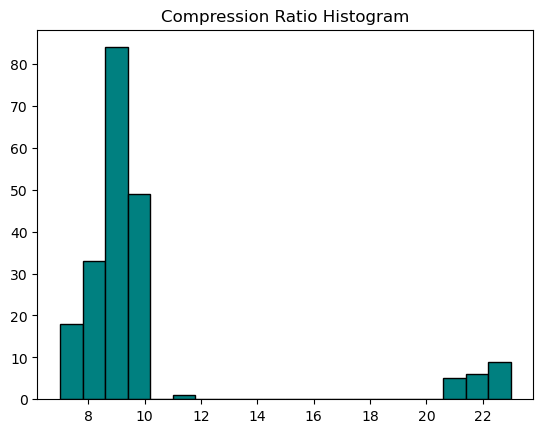

In [47]:
plt.figure()
plt.hist(car_df['compressionratio'], bins = 20,edgecolor='black',color='teal')
plt.title('Compression Ratio Histogram')
plt.show()

#### Comparing engine size between two peaks

In [48]:
car_df[car_df['compressionratio'] > 20]['enginesize'].mean()


np.float64(135.7)

In [49]:
car_df[car_df['compressionratio'] < 20]['enginesize'].mean()

np.float64(125.95675675675676)

**Comment**

As expected, larger engines have a higher compression ratio than smaller engines. In the dataset we have already seen there is a distinction between standard and luxury cars, this split is something that is reflected here with the two groups for compression ratio with the less frequent, higher compression ratio siginifying luxury cars.

#### Comparing compression ratio between two peaks


In [50]:
car_df[car_df['compressionratio'] < 20]['price'].mean()

np.float64(12999.7982)

In [51]:
car_df[car_df['compressionratio'] > 20]['price'].mean()

np.float64(15838.15)

**Comment**

Differences in price further strengthen the argument that the two groups we see in compression ratio histogram are for standard and luxury cars.

### Duplicates

In [52]:
car_df['CarName'].unique().tolist()

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

**Comment**
There is a spelling mistake:

    'vokswagen rabbit'

    'volkswagen rabbit'

Both rows are modelling the same car (volkswagen rabbit) but one has a spelling mistake and so this is the cause of the duplciate we get when we drop car name from the dataframe.